# Analyse de la Consommation Mondiale d'Eau 💧

Ce notebook est une version corrigée de l'analyse initiale, utilisant `pandas` au lieu de `PySpark` pour garantir la compatibilité locale.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Chemin vers le fichier CSV
csv_path = "cleaned_global_water_consumption.csv"

# Vérification de l'existence du fichier
if not os.path.exists(csv_path):
    print(f"❌ Le fichier '{csv_path}' est introuvable.")
else:
    df = pd.read_csv(csv_path)
    print("✅ Fichier chargé avec succès.")
    display(df.head())


✅ Fichier chargé avec succès.


,Country;Year;Total Water Consumption (Billion Cubic Meters);Per Capita Water Use (Liters per Day);Agricultural Water Use (%);Industrial Water Use (%);Household Water Use (%);Rainfall Impact (Annual Precipitation in mm);Groundwater Depletion Rate (%)
0,Argentina;2000;481.49;235.4314286;48.55;20.844...
1,Argentina;2001;455.063;299.551;48.465;26.943;2...
2,Argentina;2002;482.7492308;340.1246154;50.3753...
3,Argentina;2003;452.66;326.7566667;49.08666667;...
4,Argentina;2004;634.566;230.346;38.67;36.67;23....


## 🔍 Nettoyage des données

In [4]:
# Séparer les données en colonnes distinctes
df_clean = df['Country;Year;Total Water Consumption (Billion Cubic Meters);Per Capita Water Use (Liters per Day);Agricultural Water Use (%);Industrial Water Use (%);Household Water Use (%);Rainfall Impact (Annual Precipitation in mm);Groundwater Depletion Rate (%)'].str.split(';', expand=True)

# Renommer les colonnes
df_clean.columns = ['Country', 'Year', 'Total_Water_Consumption', 'Per_Capita_Water_Use', 
                   'Agricultural_Water_Use', 'Industrial_Water_Use', 'Household_Water_Use',
                   'Rainfall', 'Groundwater_Depletion']

# Supprimer la première ligne (en-tête) si nécessaire
df_clean = df_clean.iloc[1:]

# Convertir les types de données
numeric_cols = ['Year', 'Total_Water_Consumption', 'Per_Capita_Water_Use', 
               'Agricultural_Water_Use', 'Industrial_Water_Use', 'Household_Water_Use',
               'Rainfall', 'Groundwater_Depletion']

for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Supprimer les lignes avec valeurs manquantes
df_clean = df_clean.dropna()

# Vérifier les valeurs manquantes
print("\nValeurs manquantes après nettoyage:")
print(df_clean.isnull().sum())

# Afficher les premières lignes
print("\nDonnées nettoyées:")
print(df_clean.head())


Valeurs manquantes après nettoyage:
Country                    0
Year                       0
Total_Water_Consumption    0
Per_Capita_Water_Use       0
Agricultural_Water_Use     0
Industrial_Water_Use       0
Household_Water_Use        0
Rainfall                   0
Groundwater_Depletion      0
dtype: int64

Données nettoyées:
     Country  Year  Total_Water_Consumption  Per_Capita_Water_Use  \
1  Argentina  2001               455.063000            299.551000   
2  Argentina  2002               482.749231            340.124615   
3  Argentina  2003               452.660000            326.756667   
4  Argentina  2004               634.566000            230.346000   
5  Argentina  2005               458.077000            265.012000   

   Agricultural_Water_Use  Industrial_Water_Use  Household_Water_Use  \
1               48.465000             26.943000            22.550000   
2               50.375385             29.042308            23.349231   
3               49.086667             

## 📊 Consommation totale par pays

Country
Brazil          13263.287436
China           13133.596733
USA             13058.950844
Saudi Arabia    12966.078679
Argentina       12803.370759
Germany         12668.588927
France          12596.115707
Japan           12585.683217
India           12581.662785
South Africa    12544.930893
Australia       12505.778389
Italy           12449.631513
Russia          12385.526576
Canada          12352.694690
South Korea     12184.867481
UK              12161.474784
Indonesia       12151.267472
Mexico          12058.054255
Turkey          11882.584874
Spain           11796.579075
Name: Total_Water_Consumption, dtype: float64


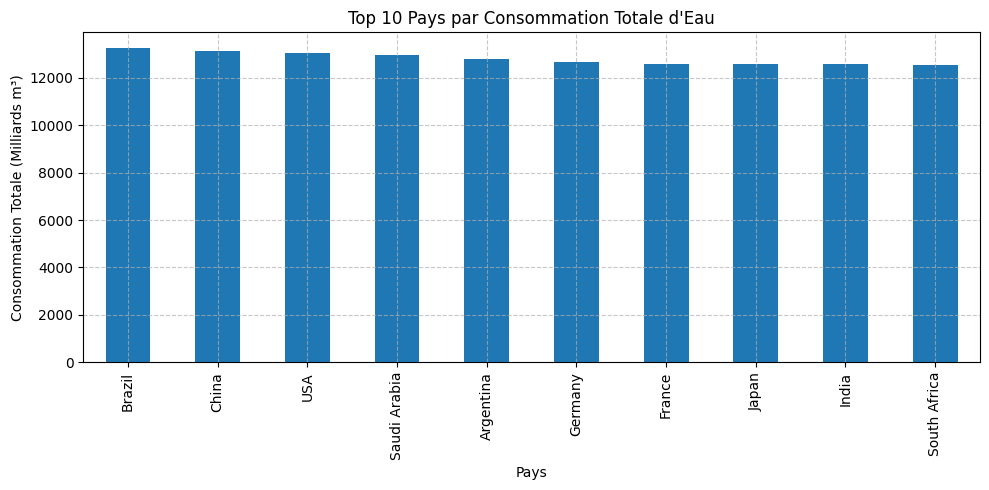

In [5]:
# Agrégation
total_by_country = df_clean.groupby("Country")["Total_Water_Consumption"].sum().sort_values(ascending=False)

# Affichage
print(total_by_country)

# Visualisation
total_by_country.head(10).plot(kind='bar', figsize=(10,5), title="Top 10 Pays par Consommation Totale d'Eau")
plt.ylabel("Consommation Totale (Milliards m³)")
plt.xlabel("Pays")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 🌦️ Corrélation entre précipitations, température et consommation

Colonnes disponibles dans df_clean:
['Country', 'Year', 'Total_Water_Consumption', 'Per_Capita_Water_Use', 'Agricultural_Water_Use', 'Industrial_Water_Use', 'Household_Water_Use', 'Rainfall', 'Groundwater_Depletion']


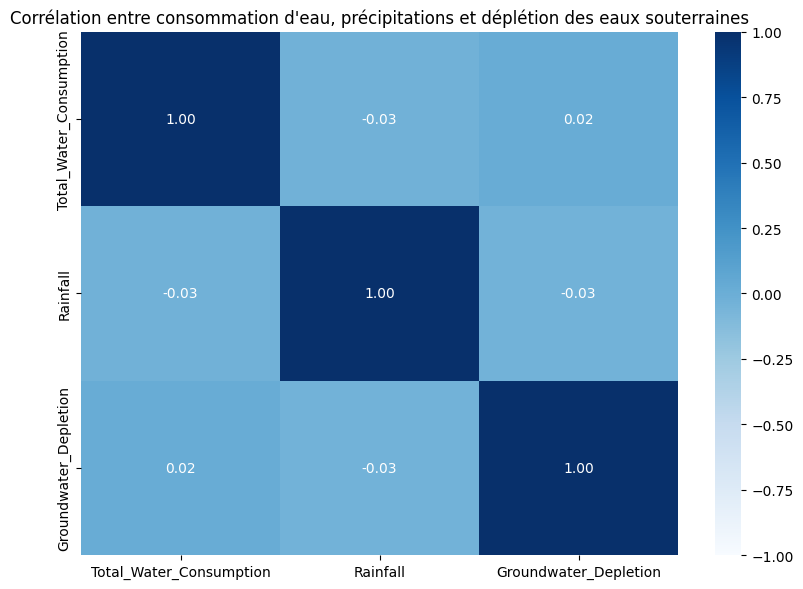

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vérifions d'abord les colonnes disponibles
print("Colonnes disponibles dans df_clean:")
print(df_clean.columns.tolist())

try:
    corr = df_clean[["Total_Water_Consumption", "Rainfall", "Groundwater_Depletion"]].corr()
    
    # Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', vmin=-1, vmax=1)
    plt.title("Corrélation entre consommation d'eau, précipitations et déplétion des eaux souterraines")
    plt.tight_layout()
    plt.show()
    
except KeyError as e:
    print(f"\nErreur: Colonne non trouvée - {e}")
    print("Veuillez vérifier les noms des colonnes dans votre DataFrame.")